In [3]:
import pandas as pd

In [4]:
df=pd.read_csv("btc_1m_data.csv")
df

timestamp     open     high      low    close        vol
0     2025-02-18 06:36:00  95331.8  95332.6  95294.1  95301.6   5.079237
1     2025-02-18 06:37:00  95301.6  95326.4  95271.3  95319.9   3.267250
2     2025-02-18 06:38:00  95319.9  95332.7  95303.9  95304.0   0.676588
3     2025-02-18 06:39:00  95308.8  95308.8  95261.7  95285.9  11.140823
4     2025-02-18 06:40:00  95285.9  95300.0  95256.3  95299.9   3.533684
...                   ...      ...      ...      ...      ...        ...
1435  2025-02-19 06:31:00  95378.7  95383.4  95358.0  95378.4   0.924602
1436  2025-02-19 06:32:00  95378.6  95388.3  95374.0  95388.3   0.323909
1437  2025-02-19 06:33:00  95388.2  95388.3  95386.6  95388.1   0.066854
1438  2025-02-19 06:34:00  95388.2  95390.1  95379.9  95379.9   0.289172
1439  2025-02-19 06:35:00  95379.9  95383.9  95379.9  95380.0   0.150437

[1440 rows x 6 columns]

01:51:27 - cmdstanpy - INFO - Chain [1] start processing
01:51:28 - cmdstanpy - INFO - Chain [1] done processing


Test MAE: 250.7267


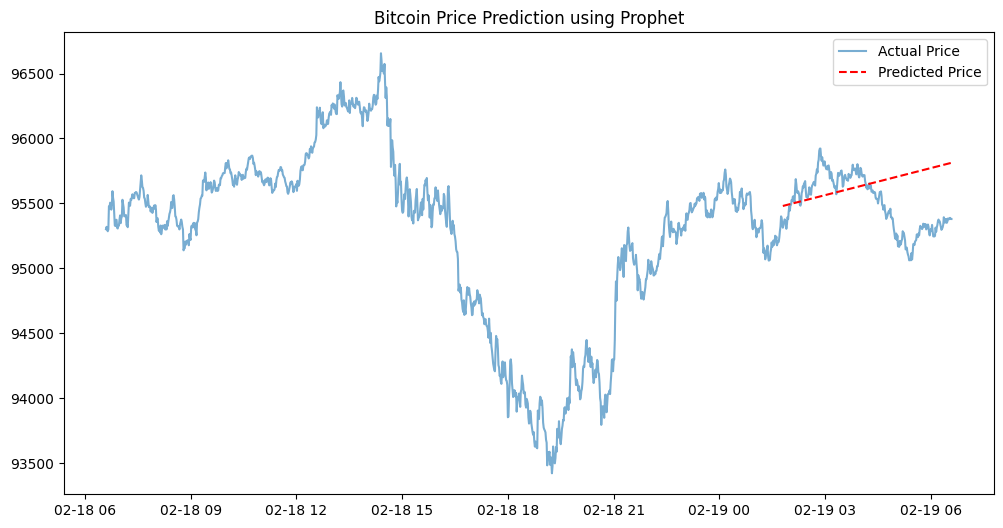

In [8]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# 1Ô∏è‚É£ Load Data
df = pd.read_csv("btc_1m_data.csv", parse_dates=["timestamp"])

# 2Ô∏è‚É£ Preprocess Data
df_prophet = df[["timestamp", "close"]].rename(columns={"timestamp": "ds", "close": "y"})

# 3Ô∏è‚É£ Split Train and Test Data
train_size = int(len(df_prophet) * 0.8)  # 80% train, 20% test
train = df_prophet[:train_size]
test = df_prophet[train_size:]

# 4Ô∏è‚É£ Train Prophet Model
model = Prophet()
model.fit(train)

# 5Ô∏è‚É£ Predict Future Data
future = model.make_future_dataframe(periods=len(test), freq="min")  # in minutes
forecast = model.predict(future)

# 6Ô∏è‚É£ Compute Test Error
test_forecast = forecast.iloc[train_size:][["ds", "yhat"]]  # Extract yhat
mae = mean_absolute_error(test["y"], test_forecast["yhat"])
print(f"Test MAE: {mae:.4f}")

# 7Ô∏è‚É£ Visualization
plt.figure(figsize=(12, 6))
plt.plot(df_prophet["ds"], df_prophet["y"], label="Actual Price", alpha=0.6)
plt.plot(test_forecast["ds"], test_forecast["yhat"], label="Predicted Price", color="red", linestyle="dashed")
plt.legend()
plt.title("Bitcoin Price Prediction using Prophet")
plt.show()

Test MAE: 13.5266


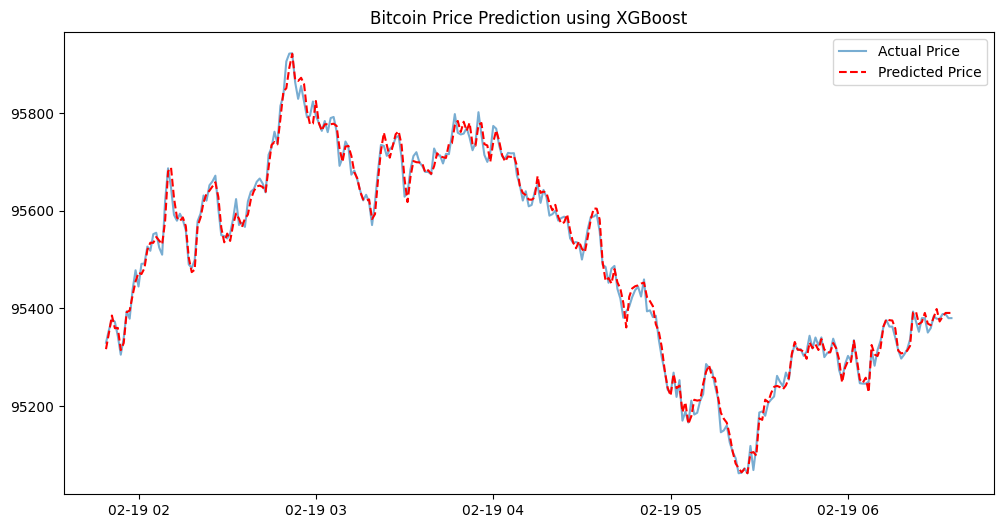

In [12]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# 1Ô∏è‚É£ Load Data
df = pd.read_csv("btc_1m_data.csv", parse_dates=["timestamp"])
df.set_index("timestamp", inplace=True)

# 2Ô∏è‚É£ Feature Engineering
# Creating lag features (previous values of close price)
for lag in range(1, 6):  # Using past 5 minutes as features
    df[f"close_lag_{lag}"] = df["close"].shift(lag)

df.dropna(inplace=True)  # Remove rows with NaN values

# 3Ô∏è‚É£ Define Features and Target
features = ["open", "high", "low", "vol"] + [f"close_lag_{lag}" for lag in range(1, 6)]
target = "close"

X = df[features]
y = df[target]

# 4Ô∏è‚É£ Split Train and Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 5Ô∏è‚É£ Train XGBoost Model
model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=5)
model.fit(X_train, y_train)

# 6Ô∏è‚É£ Make Predictions
y_pred = model.predict(X_test)

# 7Ô∏è‚É£ Compute Test Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Test MAE: {mae:.4f}")

# 8Ô∏è‚É£ Visualization
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual Price", alpha=0.6)
plt.plot(y_test.index, y_pred, label="Predicted Price", color="red", linestyle="dashed")
plt.legend()
plt.title("Bitcoin Price Prediction using XGBoost")
plt.show()

‚úÖ XGBoost ‰∫§Êòì‰ø°Âè∑È¢ÑÊµãÂáÜÁ°ÆÁéá: 1.0000
üìä ÂàÜÁ±ªÊä•Âëä:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       286

    accuracy                           1.00       286
   macro avg       1.00      1.00      1.00       286
weighted avg       1.00      1.00      1.00       286



C:\Users\36679\AppData\Local\Temp\ipykernel_43604\370189886.py:28: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[(df["raw_buy"]) & (~df["raw_buy"].shift(1).fillna(False)), "open_signal"] = 1
C:\Users\36679\AppData\Local\Temp\ipykernel_43604\370189886.py:29: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[(df["raw_sell"]) & (~df["raw_sell"].shift(1).fillna(False)), "open_signal"] = -1


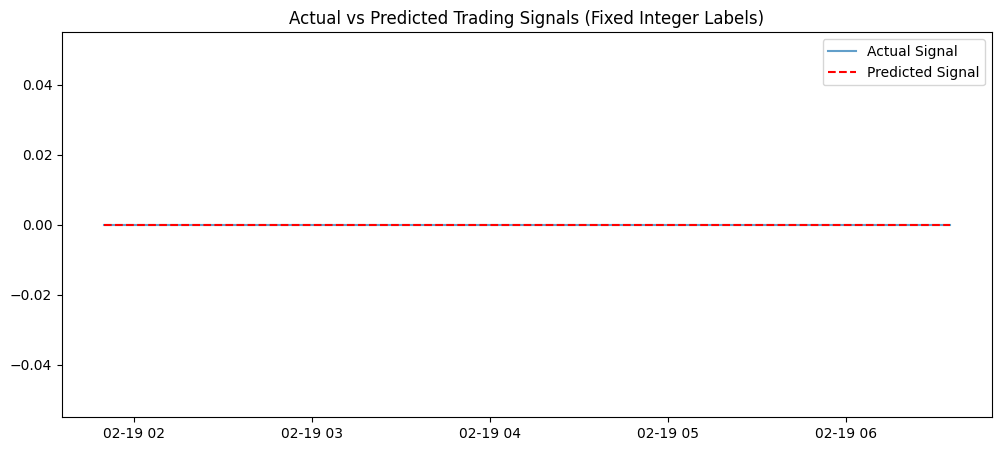

In [16]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# 1Ô∏è‚É£ ËØªÂèñÊï∞ÊçÆ
df = pd.read_csv("btc_1m_data.csv", parse_dates=["timestamp"])
df.set_index("timestamp", inplace=True)

# 2Ô∏è‚É£ ËÆ°ÁÆóÊ≥¢Âä®Áéá
volatility_window = 5
df["window_high"] = df["high"].rolling(window=volatility_window).max()
df["window_low"] = df["low"].rolling(window=volatility_window).min()
df["window_open"] = df["open"].shift(volatility_window - 1)
df["volatility"] = (df["window_high"] - df["window_low"]) / df["window_open"]

# 3Ô∏è‚É£ ËÆ°ÁÆóÂùáÁ∫ø
ma_window = 5
df["ma"] = df["close"].rolling(window=ma_window).mean()

# 4Ô∏è‚É£ ÁîüÊàê‰∫§Êòì‰ø°Âè∑
volatility_threshold = 0.005
df["raw_buy"] = (df["volatility"] >= volatility_threshold) & (df["close"] < df["ma"])
df["raw_sell"] = (df["volatility"] >= volatility_threshold) & (df["close"] > df["ma"])
df["open_signal"] = 0
df.loc[(df["raw_buy"]) & (~df["raw_buy"].shift(1).fillna(False)), "open_signal"] = 1
df.loc[(df["raw_sell"]) & (~df["raw_sell"].shift(1).fillna(False)), "open_signal"] = -1

# 5Ô∏è‚É£ ÂàõÂª∫ÊªëÂä®Á™óÂè£ÁâπÂæÅÔºàËøáÂéª 10 Ê†π K Á∫øÔºâ
train_window = 10
for lag in range(1, train_window + 1):
    df[f"close_lag_{lag}"] = df["close"].shift(lag)

df.dropna(inplace=True)

# 6Ô∏è‚É£ ÈÄâÊã©ÁâπÂæÅÂíåÁõÆÊ†á
features = ["open", "high", "low", "volatility"] + [f"close_lag_{lag}" for lag in range(1, train_window + 1)]
X = df[features]

# **‰ΩøÁî®Êï¥Êï∞Ê†áÁ≠æ‰ª£ÊõøÁã¨ÁÉ≠ÁºñÁ†Å**
df["open_signal_encoded"] = df["open_signal"] + 1  # Âèò‰∏∫ [0, 1, 2]
y = df["open_signal_encoded"]  # Áî®ÂçïÂàóÊï¥Êï∞‰Ωú‰∏∫ y

# 7Ô∏è‚É£ ÂàíÂàÜËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 8Ô∏è‚É£ ËÆ≠ÁªÉ XGBoost Â§öÂàÜÁ±ªÊ®°Âûã
model = xgb.XGBClassifier(objective="multi:softmax", num_class=3, n_estimators=100, learning_rate=0.1, max_depth=5)
model.fit(X_train, y_train)

# 9Ô∏è‚É£ È¢ÑÊµã
y_pred = model.predict(X_test)

# üîü ËΩ¨Êç¢Âõû `[-1, 0, 1]`
y_pred = y_pred - 1
y_test_labels = y_test - 1  # ÁúüÂÆûÊ†áÁ≠æËΩ¨Êç¢Âõû `[-1, 0, 1]`

# 1Ô∏è‚É£1Ô∏è‚É£ ËÆ°ÁÆóÂáÜÁ°ÆÁéá
accuracy = accuracy_score(y_test_labels, y_pred)
print(f"‚úÖ XGBoost ‰∫§Êòì‰ø°Âè∑È¢ÑÊµãÂáÜÁ°ÆÁéá: {accuracy:.4f}")

# 1Ô∏è‚É£2Ô∏è‚É£ ÂàÜÁ±ªÊä•Âëä
print("üìä ÂàÜÁ±ªÊä•Âëä:")
print(classification_report(y_test_labels, y_pred))

# 1Ô∏è‚É£3Ô∏è‚É£ ‰∫§Êòì‰ø°Âè∑ÂèØËßÜÂåñ
plt.figure(figsize=(12, 5))
plt.plot(y_test.index, y_test_labels, label="Actual Signal", alpha=0.7)
plt.plot(y_test.index, y_pred, label="Predicted Signal", linestyle="dashed", color="red")
plt.legend()
plt.title("Actual vs Predicted Trading Signals (Fixed Integer Labels)")
plt.show()
